## Advanced Regression Assignment by Sachin Katiyar

In [1]:
#Importing required libraries and setting max visible size of rows and columns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [2]:
#Reading the given train.csv file and storing it in df dataframe. Also printing five rows for the same.
df=pd.read_csv(r"C:\Users\katiy\Desktop\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Printing size of data provided, i.e. 1460 rows and 81 columns present
df.shape

(1460, 81)

In [4]:
#Printing all the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Printing info of dataframe, shows number of non-null values present in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#Changing type of MSSubClass as it belongs to categorical variable (based on data description provided)
df['MSSubClass'] = df['MSSubClass'].apply(str)
#Dropping Id column as it is of no use
df=df.drop(["Id"],axis=1)

In [7]:
#Describing the dataframe
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### As we can see, minimum value of SalePrice is above zero therefore we can say that correct information is present in this column. No need for further checking of null values in SalePrice column. Also we can see that there are many columns like BsmtFinSF2, LowQualFinSF etc that contain 50 - 75% zero as value in it. Need to check for these columns in EDA.

In [8]:
#Printing percentage of null values present in each column
print(df.isnull().sum()*100/df.shape[0])

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

### Null Value Treatment
#### LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence and MiscFeature are some columns that contain null values, Lets treat them based on data_description provided.

In [9]:
#LotFrontage column contain 17.7 percentage of null value. LotFrontage is Linear feet of street connected to property. 
#Therfore for filling null values we can say that Linear feet of street will be same as its surrounding neighbourhood houses,
# thus lets find out neighbourhood houses of houses having LotFrontage as null value and fill it with most likely value i.e.
# median of LotFrontage based on category as neighbourhood.
print(df.groupby("Neighborhood")["LotFrontage"].median())
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda null_Lot: null_Lot.fillna(null_Lot.median()))

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64


In [10]:
#Alley column contain 93.7% null values. Based on the data description provided, null values the the ones where no alley access
#is provided therefore we can fill them will None value
df["Alley"] = df["Alley"].fillna("None")

In [11]:
#MasVnrType and MasVnrArea describes the same feature (i.e. Masonry veneer) in different style, thus we can treat them equally.
#Based on the data description provided, Null value means no Masonry veneer present thus we can replace null value with zero in
#MasVnrArea and with None in MasVnrType
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df["MasVnrType"] = df["MasVnrType"].fillna("None")

In [12]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 are the columns that describe the same feature (i.e. basement).
#Based on the data description provided, Null value means No Basement present thus we can replace null values with None in 
#all these columns
df["BsmtQual"] = df["BsmtQual"].fillna(0)
df["BsmtCond"] = df["BsmtCond"].fillna(0)
df["BsmtExposure"] = df["BsmtExposure"].fillna(0)
df["BsmtFinType1"] = df["BsmtFinType1"].fillna(0)
df["BsmtFinType2"] = df["BsmtFinType2"].fillna(0)

In [13]:
print("No of rows having null values in Electrical column: ",df['Electrical'].isnull().sum())
#Electrical column contain only one null value therefore we can put most repetative value in it therfore finding the mod of this column
print("Mode of Electrical column is: ",df['Electrical'].mode()[0], ", Filling mode at null value place")
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

No of rows having null values in Electrical column:  1
Mode of Electrical column is:  SBrkr , Filling mode at null value place


In [14]:
#FireplaceQu column contain 47.2 null values, based on data description, null values are the ones having no fireplace therefore
#filling null value with None
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [15]:
#GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond are the columns that describe the same feature (i.e. Garage).
#Based on the data description provided, Null value means No Garage present thus we can replace null values with zero in GarageYrBlt
#column and with None in all other mentioned columns.
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df["GarageType"] = df["GarageType"].fillna("None")
df["GarageFinish"] = df["GarageFinish"].fillna("None")
df["GarageQual"] = df["GarageQual"].fillna("None")
df["GarageCond"] = df["GarageCond"].fillna("None")

In [16]:
#PoolQC having 99.52% of null values, based on data description, NA means No Pool thus filling it with None value.
df["PoolQC"] = df["PoolQC"].fillna("None")

In [17]:
#Fence having 80.75% null values, based on data description, NA means No Fence thus filling it with None value.
df["Fence"] = df["Fence"].fillna("None")

In [18]:
#MiscFeature having 96.3% of null values, based on data description, NA means None thus filling it with None value.
df["MiscFeature"] = df["MiscFeature"].fillna("None")

### Analysing Numerical columns along with detecting and dealing with outliers

In [19]:
#Defining function named rem_outlier to remove outlier lies below and above 0.25 and 0.75 quantile respectively and then 
#plotting scatter plot of feature passed as argument vs SalePrice column and returning resultant dataframe
def rem_outlier(df,feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    #Finding out interquartile range
    intr_qua_rnge = q3-q1 
    low  = q1-1.5*intr_qua_rnge
    high = q3+1.5*intr_qua_rnge
    df = df.loc[(df[feature] > low) & (df[feature] < high)]
    print("Rows left after removing outliers in df dataframe:",df[feature].size)
    sns.jointplot(y=feature,x="SalePrice",data=df)
    plt.show()
    return df

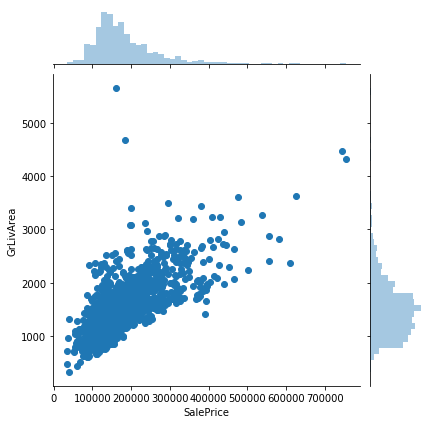

In [20]:
#Plotting scatterplot between GrLivArea vs SalePrice to detect outliers
sns.jointplot(y="GrLivArea",x="SalePrice",data=df)
plt.show()

Rows left after removing outliers in df dataframe: 1429


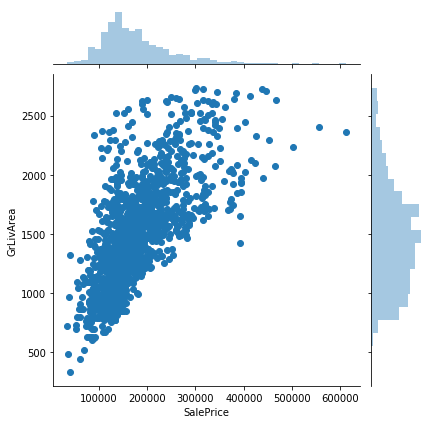

In [21]:
#As we can see in above plot, outlier exists as SalePrice is low for some of the high GrLivArea which is not possible.
#Below is the scatterplot after removing outliers
df=rem_outlier(df,"GrLivArea")

#### As the GrLivArea is increasing, Sale price is also increasing which is correct based on domain understanding.

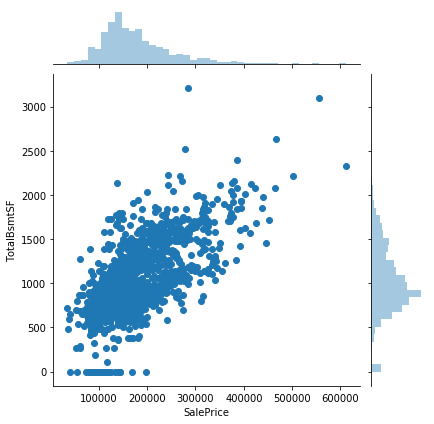

In [22]:
#Plotting scatterplot between Total Basement Area vs SalePrice to detect outliers
sns.jointplot(y="TotalBsmtSF",x="SalePrice",data=df)
plt.show()

Rows left after removing outliers in df dataframe: 1367


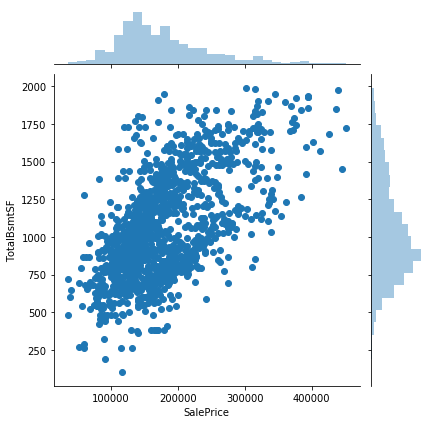

In [23]:
#As we can see in above plot, outlier exists as SalePrice is low for some of the high TotalBsmtSF which is not possible. Also for 
#some TotalBsmtSF is zero and still it has some saleprice which is totally wrong.
#Below is the scatterplot after removing outliers
df=rem_outlier(df,"TotalBsmtSF")

#### As the  Total Basement Surface Area is increasing, Sale price is also increasing which is also correct based on domain understanding.

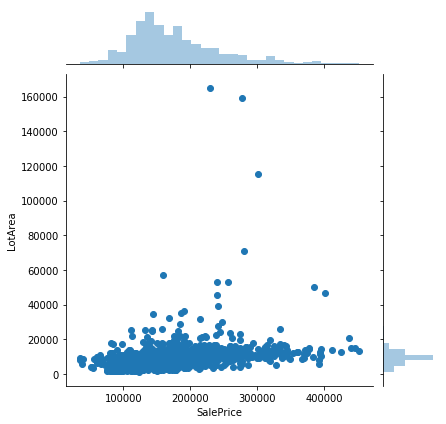

In [24]:
#Plotting scatterplot between Lot Area vs SalePrice to detect outliers
sns.jointplot(y="LotArea",x="SalePrice",data=df)
plt.show()

Rows left after removing outliers in df dataframe: 1289


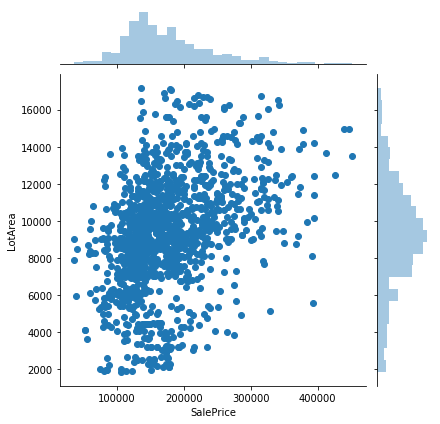

In [25]:
#As we can see in above plot, outlier exists as LotArea is very high for some of the mid range SalePrice.
#Below is the scatterplot after removing outliers
df=rem_outlier(df,"LotArea")

#### As the Lot Area is increasing, Sale price is also increasing which is also correct based on domain understanding.

#### Now we can see that points are distributed properly. Also based on data description and domain understanding, main columns (Lot Area, Total Basement Surface Area and Above ground living area) that contribute more for cost of property have been treated with outliers. Lets proceed further for analysing more columns. 

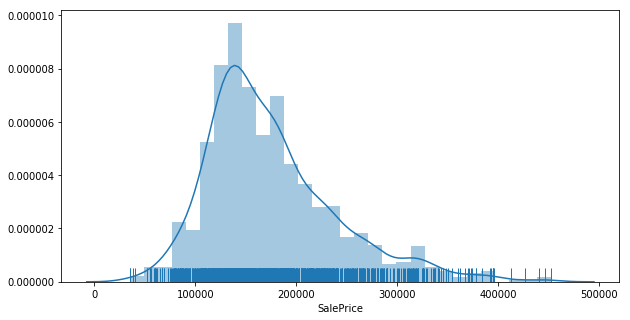

In [26]:
#Plotting histogram plot on SalePrice column
plt.figure(figsize=(10,5))
sns.distplot(df['SalePrice'],rug=True)
plt.show()

#### Above graph shows that Maximum value lies between 100000 and 250000 for SalePrice column and graph is little left skewed.

### Analysing Categorical columns

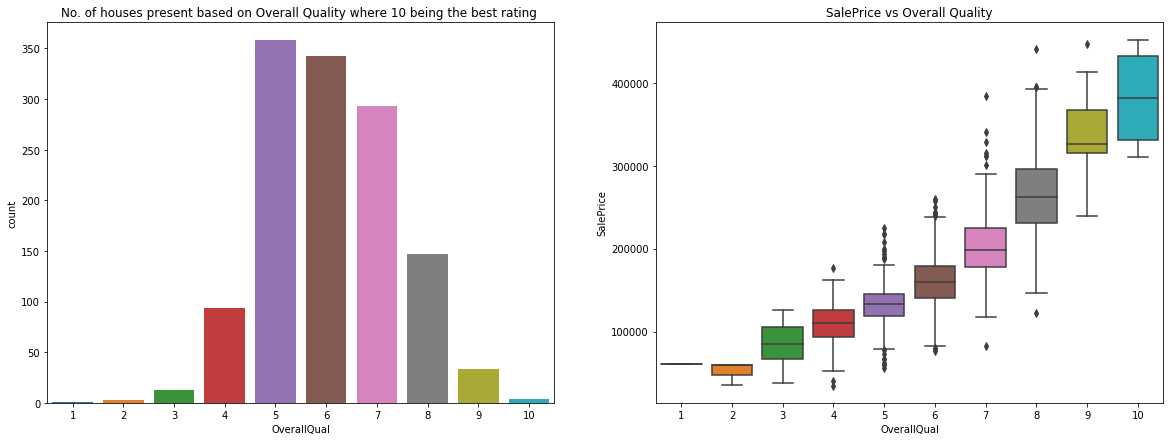

In [27]:
# Bar Graph to show houses present based on OverallQual rating. 
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No. of houses present based on Overall Quality where 10 being the best rating ")
sns.countplot(df["OverallQual"])
# Box plot to show distribution of Saleprice vs Overall Quality.
plt.subplot(1,2,2)
plt.title("SalePrice vs Overall Quality")
sns.boxplot(x=df["OverallQual"],y=df["SalePrice"])
plt.show()

#### From above graph, it can be seen that more the overall quality rating, more will be the price. Also most people preferred average or little above average rating houses.

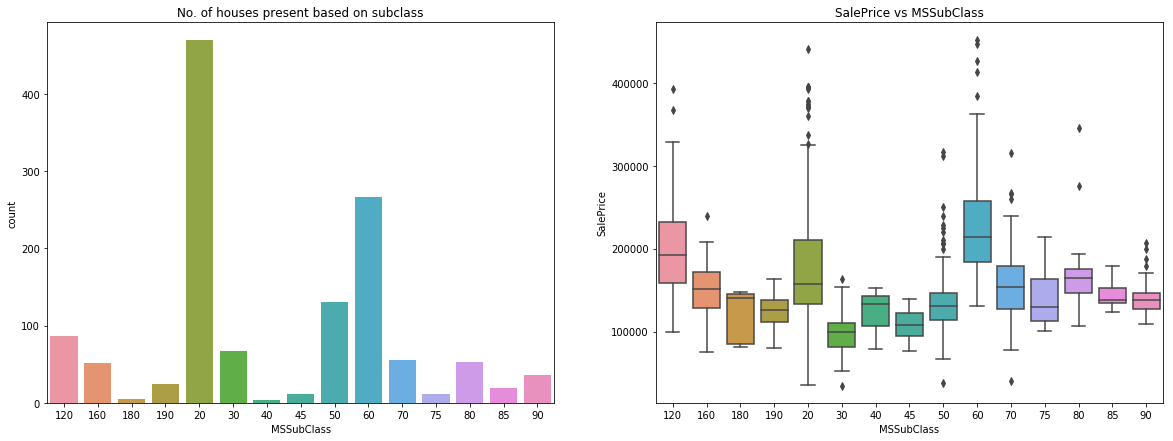

In [28]:
# Bar Graph to show type of houses present based on subclass. 
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No. of houses present based on subclass")
sns.countplot(df["MSSubClass"])
# Box plot to show distribution of Saleprice vs MSSubClass.
plt.subplot(1,2,2)
plt.title("SalePrice vs MSSubClass")
sns.boxplot(x=df["MSSubClass"],y=df["SalePrice"])
plt.show()

#### From the above plot, we can see that subclass 20 (1-STORY 1946 & NEWER ALL STYLES) and 60 (2-STORY 1946 & NEWER) is much preferred over others as subclass 20 is cheaper and can be considered by averge salaried people while subclass 60 preferred by high salaried people being costlier.

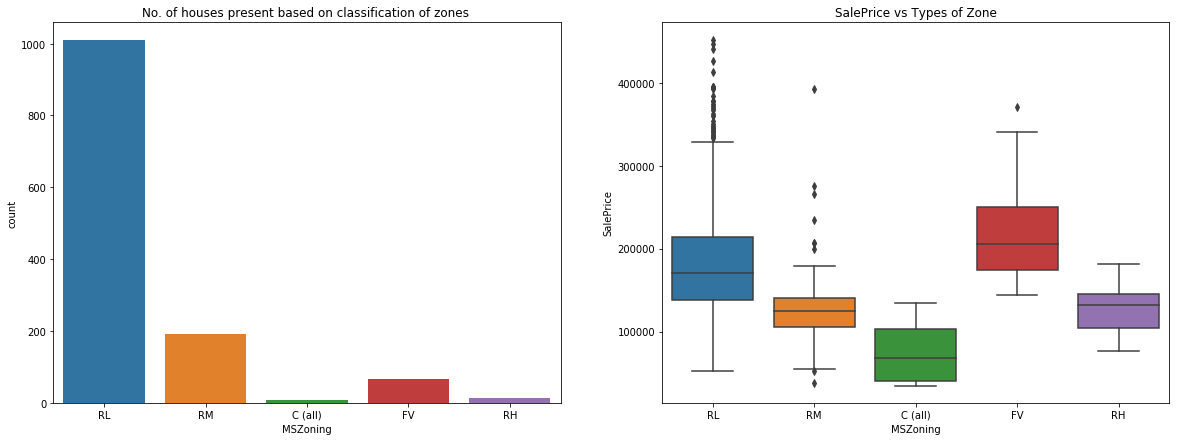

In [29]:
# Bar Graph to show number of houses present in a particular zone
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No. of houses present based on classification of zones ")
sns.countplot(df["MSZoning"])
# Box plot to show distribution of Saleprice vs Zone types.
plt.subplot(1,2,2)
plt.title("SalePrice vs Types of Zone")
sns.boxplot(x=df["MSZoning"],y=df["SalePrice"])
plt.show()

#### From the above plot it can be seen that most people preferred Low Density Zone for their homes. We can see little bit of trend in this: Salesprice of Floating Village Residential >  Residential Low Density > Residential High Density = Residential Medium Density > Commercial

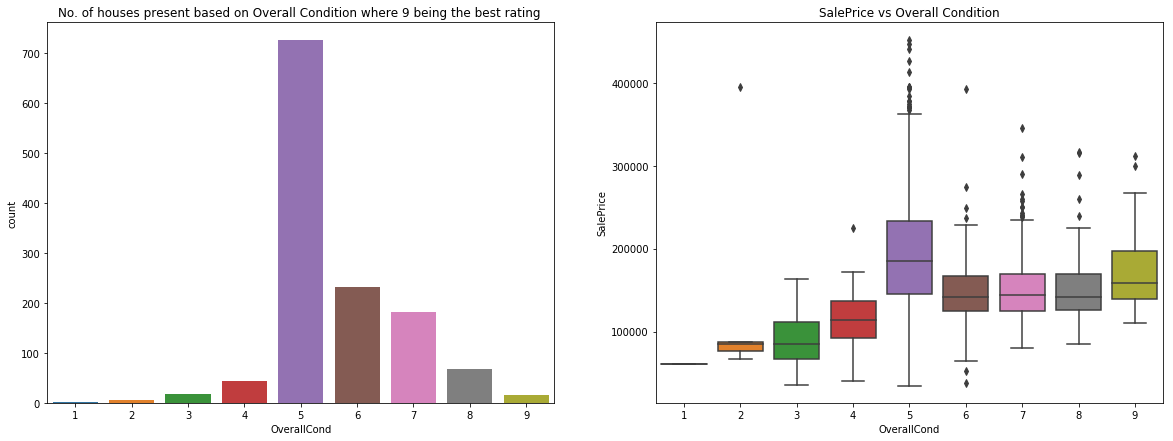

In [30]:
# Bar Graph to show no of houses present based on Overall Condition rating.
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No. of houses present based on Overall Condition where 9 being the best rating ")
sns.countplot(df["OverallCond"])
# Box plot to show distribution of Saleprice vs Overall Condition.
plt.subplot(1,2,2)
plt.title("SalePrice vs Overall Condition")
sns.boxplot(x=df["OverallCond"],y=df["SalePrice"])
plt.show()

#### From above graph, we can only conclude that 5 rating is most preferred as also has high saleprice. All above 5 are having nearly same SalePrice.

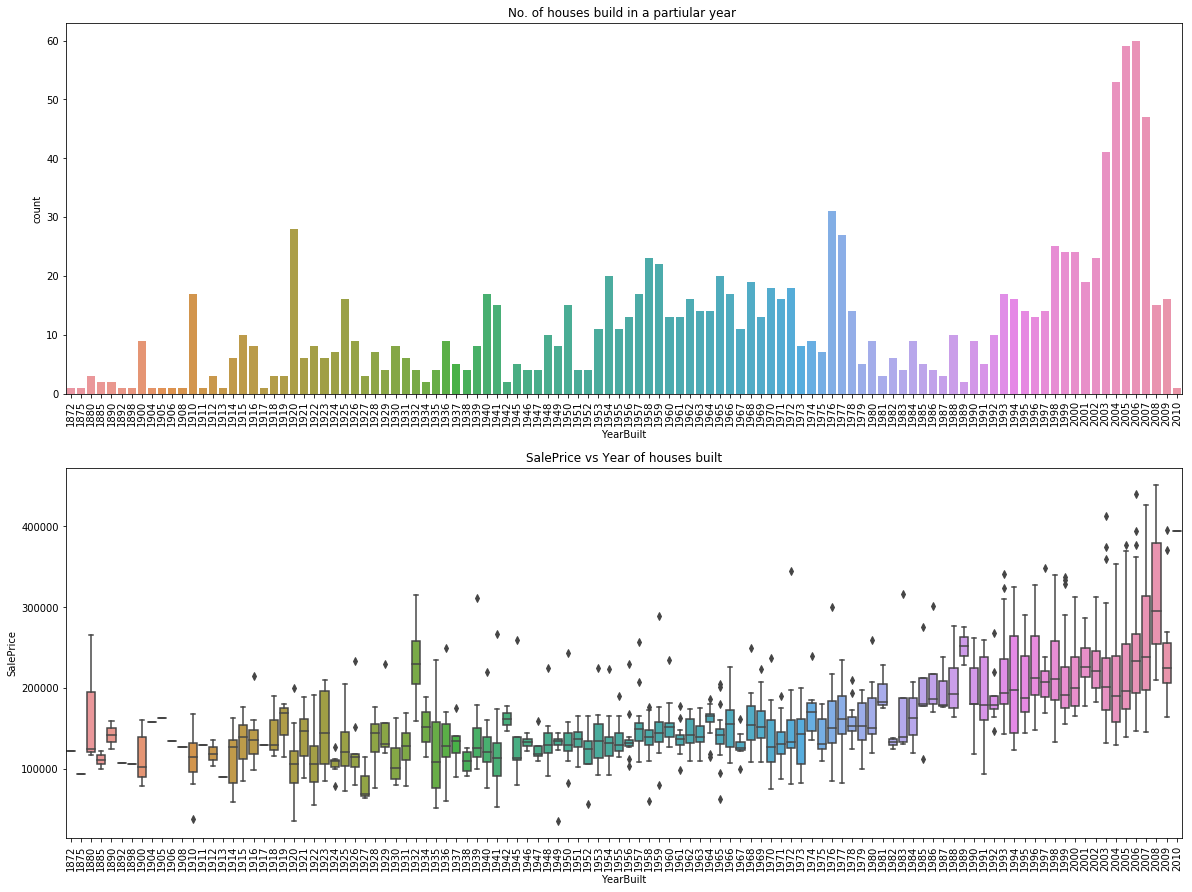

In [31]:
# Bar Graph to show how much old house is preferred over others. 
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.xticks(rotation=90)
plt.title("No. of houses build in a partiular year ")
g=sns.countplot(df["YearBuilt"])
# Box plot to show distribution of Saleprice vs Year of houses built.
plt.subplot(2,1,2)
plt.xticks(rotation=90)
plt.title("SalePrice vs Year of houses built")
g=sns.boxplot(x=df["YearBuilt"],y=df["SalePrice"])
plt.show()

#### Not much can be derived from above graph, only one thing we can say after looking at the right side of the graph i.e. new houses are costlier.

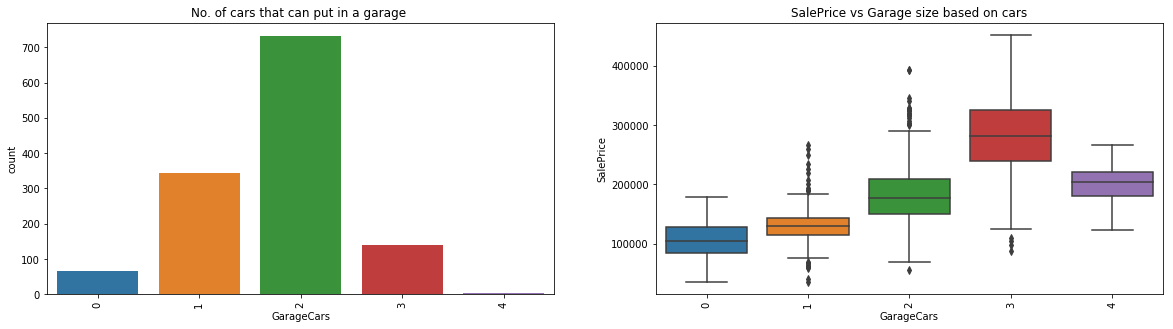

In [32]:
# Bar Graph to show how many houses are present that are having 0,1,2,3 or 4 car space garage.
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("No. of cars that can put in a garage ")
g=sns.countplot(df["GarageCars"])
# Box plot to show distribution of Saleprice vs Garage size based on no of cars that can be fit inside it.
plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.title("SalePrice vs Garage size based on cars")
g=sns.boxplot(x=df["GarageCars"],y=df["SalePrice"])
plt.show()

#### From above plot we can say that more the no of cars put inside a garage, more the sale price of houses. Instead no of cars as 4 showing low Sale Price as because few data points are present in it

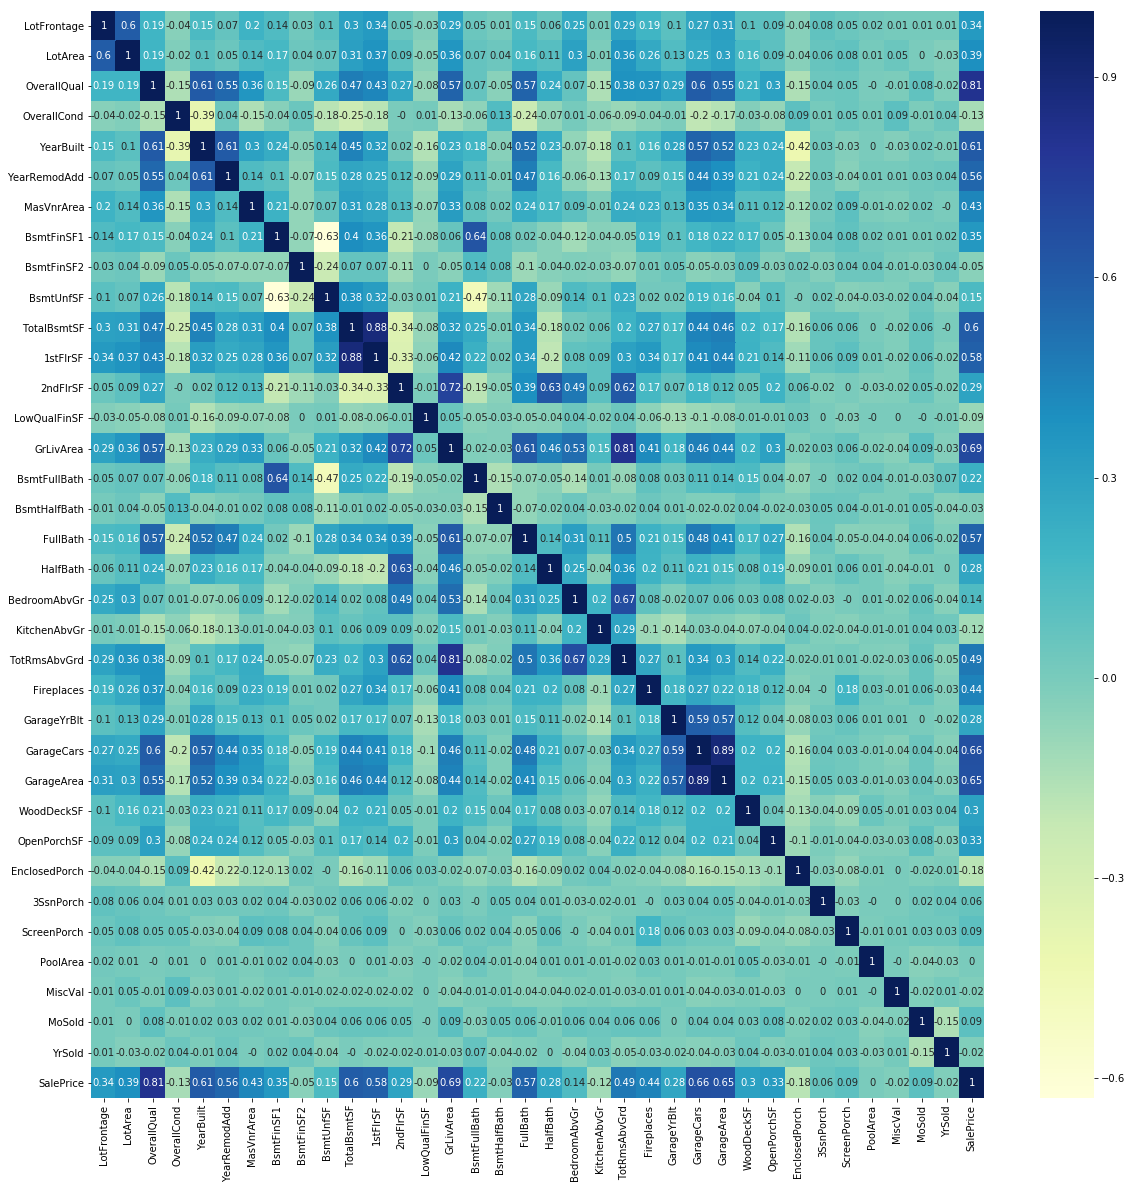

In [33]:
#Plotting HeatMap for all the numerical variables to see correlation between SalePrice and other dependent variables
plt.figure(figsize=(20,20))
sns.heatmap(round(df.corr(),2),annot=True,cmap="YlGnBu")
plt.show()

#### From above correlation matrix obtained from plotting heatmap, we can see that SalePrice is highly positively correlated with OverallQual, GrLiveArea, GarageCars, GarageArea, YearBuilt, TotalBsmtSF and 1stFlrSF. They can contribute in predecting Sales Price.

### Creating dummy variables for categorial features

In [34]:
# Segregating numerical and categorical variables respectively
df_numerical = list(df.select_dtypes(include=['float64','int64']))
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [35]:
# Converting categorical variable into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,

In [36]:
# Dropping categorical variables from main dataframe df
df = df.drop(list(df_categorical.columns), axis=1)

In [37]:
# Concat dummy variables with main dataframe df
df = pd.concat([df, df_dummies], axis=1)

In [38]:
#Total columns count after dummy variable implementation
print("Total no of columns present in df dataframe:",df.columns.shape[0])

Total no of columns present in df dataframe: 255


### Test and Train split of data

In [39]:
#Splitting test and train set (70% train set and 30% test set)
from sklearn.model_selection import train_test_split
np.random.seed(100)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
#Scaling all the numerical variables except dummy variables
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df_train[df_numerical] = scaling.fit_transform(df_train[df_numerical])
df_train.head()

C:\Users\katiy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
985,0.356061,0.590073,0

In [41]:
#Segregating dependent and independent variable from dataframe into y_train and X_train respectively. 
y_train = df_train.pop('SalePrice')
X_train = df_train

### Using RFE for getting variables that explains most of the variance

In [42]:
#Importing libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
#Finding the 10 most significant variables from independent dataset.
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
rfe = RFE(lin_model, 10)
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 154),
 ('LotArea', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 113),
 ('MasVnrArea', False, 123),
 ('BsmtFinSF1', False, 11),
 ('BsmtFinSF2', False, 22),
 ('BsmtUnfSF', False, 21),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 15),
 ('2ndFlrSF', False, 13),
 ('LowQualFinSF', False, 39),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 165),
 ('BsmtHalfBath', False, 168),
 ('FullBath', False, 173),
 ('HalfBath', False, 183),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 126),
 ('Fireplaces', False, 240),
 ('GarageYrBlt', False, 132),
 ('GarageCars', False, 12),
 ('GarageArea', False, 61),
 ('WoodDeckSF', False, 141),
 ('OpenPorchSF', False, 190),
 ('EnclosedPorch', False, 158),
 ('3SsnPorch', False, 140),
 ('ScreenPorch', False, 131),
 ('PoolArea', False, 30),
 ('MiscVal', True, 1),
 ('MoSold', False, 195),
 ('YrSold', False, 223),
 ('MSSubClass_160', Fals

In [45]:
#Printing 10 most significant variables
X_train.columns[rfe.support_]

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'MiscVal', 'MiscFeature_None',
       'MiscFeature_Shed'],
      dtype='object')

### Building model using statsmodels for detailed analysis

In [46]:
X_train_final_rfe = X_train[X_train.columns[rfe.support_]]
X_train_final_rfe.head()

,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,MiscVal,MiscFeature_None,MiscFeature_Shed
985,0.444444,0.500,0.565217,0.562998,0.263431,0.5,0.333333,0.0,1,0
713,0.333333,0.500,0.710145,0.454545,0.167295,0.5,0.333333,0.0,1,0
184,0.444444,0.875,0.260870,0.212121,0.304901,0.5,0.333333,0.0,1,0
1082,0.666667,0.500,0.942029,0.719830,0.402451,0.5,0.333333,0.0,1,0
416,0.555556,0.750,0.768116,0.301435,0.374647,0.5,0.333333,0.0,1,0


### MODEL 1

In [47]:
#Importing libraries and adding constant to train dataset
import statsmodels.api as sm
X_train_final_rfe = sm.add_constant(X_train_final_rfe)

In [48]:
#Fitting data points learned into a model
lin_model = sm.OLS(y_train,X_train_final_rfe).fit()

In [49]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     437.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:27:56   Log-Likelihood:                 1206.8
No. Observations:                 902   AIC:                            -2392.
Df Residuals:                     891   BIC:                            -2339.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5376      0.311  

In [50]:
#MiscFeature_None having p-value greater than 0.05 hence dropping this column.
X_train_new = X_train_final_rfe.drop(["MiscFeature_None"], axis = 1)

### MODEL 2

In [51]:
#Again adding constant to new train set and fitting it into a new model and printing the summary
X_train_final_rfe = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_final_rfe).fit()
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     485.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:27:56   Log-Likelihood:                 1206.1
No. Observations:                 902   AIC:                            -2392.
Df Residuals:                     892   BIC:                            -2344.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1745      0.023  

In [52]:
#MiscVal having p-value greater than 0.05 hence dropping this column.
X_train_new = X_train_final_rfe.drop(["MiscVal"], axis = 1)

### MODEL 3

In [53]:
#Again adding constant to new train set and fitting it into a new model and printing the summary
X_train_final_rfe = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_final_rfe).fit()
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     546.9
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:27:56   Log-Likelihood:                 1206.1
No. Observations:                 902   AIC:                            -2394.
Df Residuals:                     893   BIC:                            -2351.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1746      0.023  

In [54]:
#MiscFeature_Shed having p-value greater than 0.05 hence dropping this column.
X_train_new = X_train_final_rfe.drop(["MiscFeature_Shed"], axis = 1)

### Model 4

In [55]:
#Again adding constant to new train set and fitting it into a new model and printing the summary
X_train_final_rfe = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_final_rfe).fit()
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     625.5
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:27:57   Log-Likelihood:                 1206.0
No. Observations:                 902   AIC:                            -2396.
Df Residuals:                     894   BIC:                            -2357.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1744      0.023     -7.584   

In [56]:
#Since no column in above obtained model is having p-value greater than 0.05 than moving towards checking of multi-collinearity.
#Calculating the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,117.03
1,OverallQual,2.63
5,GrLivArea,2.45
3,YearBuilt,2.04
6,BedroomAbvGr,1.56
4,TotalBsmtSF,1.43
2,OverallCond,1.31
7,KitchenAbvGr,1.18


#### Since no column shown above having VIF greater than 5 therefore we can say that these columns will contribute towards predicting Sale Price. Columns are: OverallQual, GrLivArea, YearBuilt, BedroomAbvGr, TotalBsmtSF, OverallCond and KitchenAbvGr.

### Residual Analysis of the train data
#### Plotting histogram of the error terms to check if the error terms are also normally distributed.

In [57]:
y_train_predict = lin_model.predict(X_train_final_rfe)

Text(0.5, 0, 'Errors')

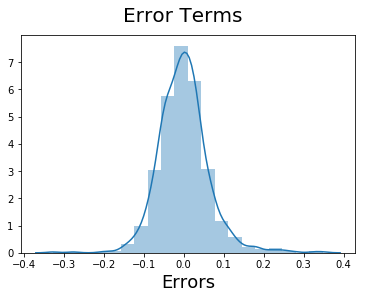

In [58]:
# Plotting histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 

#### Error Terms are normally distributed and having mean value as zero which makes our assumption right towards making linear model for the given problem.

### Making predictions

In [59]:
#Scaling on the test set
df_test[df_numerical] = scaling.fit_transform(df_test[df_numerical])
df_test.head()

C:\Users\katiy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.242236,0.477823,

In [60]:
#Segregating dependent and independent variable from dataframe into y_test and X_test respectively.
y_test = df_test.pop('SalePrice')
X_test = df_test

In [61]:
# Dropping const variable for procedding towards making prediction. 
X_train_new = X_train_new.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable to X_test_new
X_test_new = sm.add_constant(X_test_new)

In [62]:
# Making Predictions
y_pred = lin_model.predict(X_test_new)

In [63]:
#Calculating R-squared score on the test set.
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8039063680937232

#### Therefore we can say that 80% of variance is explained by our model when ran on test set.

### Model Evaluation

Text(0, 0.5, 'y_pred')

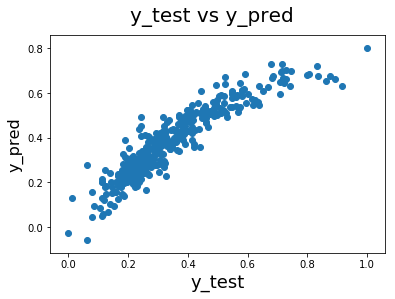

In [64]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

#### Above graph shows a straight line between y_test and y_pred which evaluate our model to success.

#### Now lets move towards finding a model which is more generalized than the above one using ridge and lasso regression.

### Ridge and Lasso Regression

In [65]:
#Importing required libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [66]:
# list of alpha range to tune for ridge regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation taking folds as 10
folds = 10
model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)          
#Fitting the model on train set after K-fold cross validation
model_ridge.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    4.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [67]:
#Collecting results in a dataframe named ridge_results
ridge_results = pd.DataFrame(model_ridge.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010948,0.001350,0.001798,0.000400,0.0001,{'alpha': 0.0001},-0.036628,-0.033931,-0.035410,-0.034507,-0.037518,-0.043634,-0.031891,-0.040185,-0.033909,-0.039426,-0.036701,0.003365,23,-0.025459,-0.025879,-0.025293,-0.025371,-0.025141,-0.024193,-0.025931,-0.024914,-0.025902,-0.025049,-0.025313,0.000509
1,0.012493,0.001117,0.002251,0.000602,0.001,{'alpha': 0.001},-0.036590,-0.033914,-0.035408,-0.034440,-0.037332,-0.043613,-0.031869,-0.040165,-0.033907,-0.039140,-0.036635,0.003341,22,-0.025455,-0.025879,-0.025296,-0.025380,-0.025139,-0.024192,-0.025934,-0.024920,-0.025899,-0.025058,-0.025315,0.000508
2,0.011748,0.002429,0.002451,0.000470,0.01,{'alpha': 0.01},-0.036344,-0.033685,-0.035345,-0.034076,-0.036114,-0.043463,-0.031753,-0.040102,-0.033864,-0.038897,-0.036361,0.003341,21,-0.025449,-0.025904,-0.025338,-0.025429,-0.025134,-0.024212,-0.025966,-0.024965,-0.025888,-0.025102,-0.025339,0.000504
3,0.010396,0.002059,0.001826,0.000421,0.05,{'alpha': 0.05},-0.036415,-0.032974,-0.034908,-0.033377,-0.034773,-0.043082,-0.031624,-0.040276,-0.033639,-0.038766,-0.035980,0.003458,20,-0.025514,-0.026004,-0.025455,-0.025534,-0.025217,-0.024316,-0.026070,-0.025093,-0.025936,-0.025199,-0.025434,0.000497
4,0.010404,0.000923,0.001689,0.000474,0.1,{'alpha': 0.1},-0.036394,-0.032653,-0.034452,-0.032836,-0.034443,-0.042816,-0.031488,-0.040439,-0.033391,-0.038627,-0.035751,0.003545,19,-0.025605,-0.026099,-0.025582,-0.025649,-0.025311,-0.024445,-0.026172,-0.025194,-0.026023,-0.025293,-0.025537,0.000489


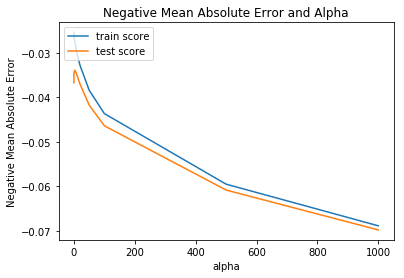

In [68]:
# plotting mean test and train scores with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int64')

# plotting the graph to get optimal value of alpha
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [69]:
print("Best alpha obtained from above graph: ",model_ridge.best_params_)
#Setting best alpha obtained above into alpha variable and again forming the model on train dataset
alpha = 3
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train, y_train)
ridge_final.coef_

Best alpha obtained from above graph:  {'alpha': 3.0}


array([ 3.38463247e-03,  5.87841364e-02,  1.12276874e-01,  7.13121007e-02,
        5.58359144e-02,  2.44248405e-02,  2.20654790e-02,  6.17369576e-02,
        9.87697079e-03,  1.47587990e-02,  7.51242181e-02,  7.59827794e-02,
        6.94768850e-02, -2.27034827e-02,  1.05755671e-01,  2.50131202e-02,
       -3.67488803e-03,  2.58291026e-02,  1.90846063e-02, -2.86978394e-02,
       -2.09161850e-02,  2.35643711e-02,  1.77421330e-02, -5.92186212e-03,
        4.41839038e-02,  4.86273579e-02,  2.60556812e-02,  9.16527536e-03,
        2.40801478e-03,  7.85594718e-03,  1.72752349e-02,  1.01091061e-02,
        7.56642981e-03,  3.64875282e-03, -2.36808843e-03, -2.23560671e-02,
        7.24271430e-03, -7.56451468e-03,  1.25182112e-02,  6.32761424e-03,
        5.90650849e-03,  1.12224645e-02,  8.33055650e-03,  1.57477864e-02,
        1.17891613e-02,  1.61140262e-02,  8.99954244e-04, -5.33163058e-04,
       -1.96057772e-02,  3.40129972e-02,  1.75011834e-02,  2.32389346e-02,
        1.12848489e-02,  

In [70]:
#Printing ridge score on train and test dataset
print("Ridge score on train dataset:",ridge_final.score(X_train,y_train))
print("Ridge score on test dataset",ridge_final.score(X_test,y_test))

Ridge score on train dataset: 0.9344231540870447
Ridge score on test dataset 0.9285632221279969


#### Therefore model obtained will explain 93.4% of variance in train dataset while 92.8% of variance in test dataset which is very good.

In [71]:
# Lets find out coefficient of all the features
features=pd.DataFrame(X_train.columns,columns=['Column Names'])
features['Coefficient']=ridge_final.coef_
top_features=features[features['Coefficient']>0]
print(top_features.sort_values(by=['Coefficient'],ascending=False))

              Column Names  Coefficient
2              OverallQual     0.112277
14               GrLivArea     0.105756
11                1stFlrSF     0.075983
10             TotalBsmtSF     0.075124
3              OverallCond     0.071312
12                2ndFlrSF     0.069477
90    Neighborhood_StoneBr     0.062413
7               BsmtFinSF1     0.061737
1                  LotArea     0.058784
4                YearBuilt     0.055836
84    Neighborhood_NridgHt     0.049325
25              GarageArea     0.048627
24              GarageCars     0.044184
241           SaleType_CWD     0.043843
74    Neighborhood_Crawfor     0.041639
83    Neighborhood_NoRidge     0.038010
173        BsmtExposure_Gd     0.035034
49             MSZoning_FV     0.034013
125    Exterior1st_BrkFace     0.030471
253  SaleCondition_Partial     0.028502
26              WoodDeckSF     0.026056
17                FullBath     0.025829
15            BsmtFullBath     0.025013
81    Neighborhood_NPkVill     0.024897


In [72]:
# Lasso regression
lasso = Lasso()

# list of alpha range to tune for lasso regression
params = {'alpha': [ 0.00001, 0.00005, 0.0001, 0.0005,0.001,0.005]}

# cross validation using folds as 10
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
#Fitting the model on train set after K-fold cross validation
model_lasso.fit(X_train, y_train) 

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\katiy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [73]:
#Collecting results in a new dataframe named lasso_results
lasso_results = pd.DataFrame(model_lasso.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.220432,0.036633,0.001699,0.000458,1e-05,{'alpha': 1e-05},-0.035956,-0.033058,-0.033833,-0.032716,-0.034271,-0.042467,-0.030443,-0.040728,-0.033355,-0.038478,-0.035528,0.003645,4,-0.025782,-0.026329,-0.025798,-0.025881,-0.025557,-0.024598,-0.026328,-0.025388,-0.026218,-0.025485,-0.025736,0.000497
1,0.144815,0.016716,0.001904,0.000301,5e-05,{'alpha': 5e-05},-0.033777,-0.032645,-0.031611,-0.031032,-0.034210,-0.040984,-0.029090,-0.040148,-0.032652,-0.036188,-0.034231,0.003646,2,-0.026882,-0.027065,-0.027087,-0.026934,-0.026743,-0.025669,-0.027191,-0.026251,-0.027282,-0.026585,-0.026769,0.000467
2,0.092461,0.037614,0.002099,0.000830,0.0001,{'alpha': 0.0001},-0.032761,-0.031951,-0.031215,-0.030527,-0.033710,-0.040002,-0.027961,-0.039783,-0.031981,-0.034821,-0.033469,0.003651,1,-0.027962,-0.027901,-0.028007,-0.027955,-0.027567,-0.026634,-0.028256,-0.027134,-0.028140,-0.027409,-0.027697,0.000483
3,0.016683,0.002093,0.001900,0.000538,0.0005,{'alpha': 0.0005},-0.037127,-0.035657,-0.033122,-0.031742,-0.035094,-0.039911,-0.029565,-0.038637,-0.033419,-0.033160,-0.034747,0.003018,3,-0.032165,-0.032117,-0.032171,-0.032472,-0.031831,-0.031117,-0.032358,-0.031539,-0.032217,-0.031699,-0.031969,0.000396
4,0.015840,0.000898,0.001999,0.000447,0.001,{'alpha': 0.001},-0.041414,-0.039240,-0.037424,-0.035405,-0.040002,-0.043562,-0.031813,-0.039592,-0.038418,-0.034983,-0.038190,0.003238,5,-0.036201,-0.035978,-0.036353,-0.036346,-0.035759,-0.035249,-0.036430,-0.035722,-0.036071,-0.035998,-0.036011,0.000342


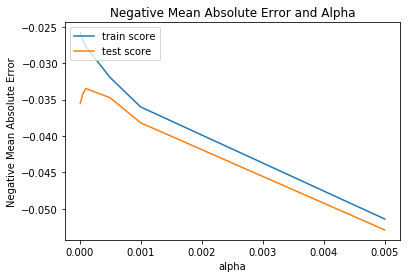

In [74]:
# plotting mean test and train scores with alpha 
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')

# plotting the graph to get optimal value of alpha
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [75]:
#Finding best value of alpha based on above graph and then setting that alpha value to form the model based on train dataset
print("Best value of alpha obtained: ",model_lasso.best_params_)
alpha = 0.0001
lasso_final = Lasso(alpha=alpha)
lasso_final.fit(X_train, y_train)
print(lasso_final.coef_)

Best value of alpha obtained:  {'alpha': 0.0001}
[-0.00000000e+00  5.97169911e-02  1.59723916e-01  9.77627043e-02
  9.69243746e-02  1.67512909e-02  1.04407988e-02  4.78550852e-02
  0.00000000e+00 -0.00000000e+00  9.86710623e-02  0.00000000e+00
  1.12079207e-02 -3.89539293e-02  2.41342389e-01  2.65730944e-02
 -0.00000000e+00  5.27368914e-03  9.31467839e-03 -3.25203001e-02
 -2.36560239e-02  0.00000000e+00  6.46248930e-03 -2.61352733e-02
  4.63615060e-02  4.19407944e-02  2.53544726e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.10006093e-02  0.00000000e+00
  0.00000000e+00  9.33240263e-04 -8.37583805e-04 -2.00013390e-02
  0.00000000e+00 -9.42138197e-03  6.76343368e-03  1.66314618e-03
  0.00000000e+00  1.32141172e-03  0.00000000e+00  7.32989285e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -4.05069425e-02  2.54924612e-02  8.27655053e-05  1.00804366e-02
  0.00000000e+00  1.38366141e-02 -4.99147546e-03 -0.00000000e+00
  0.00000000e+00 -4.62110255e-03  3.72038

In [76]:
#Printing lasso score on train and test dataset
print("Lasso score on train dataset: ",lasso_final.score(X_train,y_train))
print("Lasso score on test dataset: ",lasso_final.score(X_test,y_test))

Lasso score on train dataset:  0.9327313162433492
Lasso score on test dataset:  0.9272395554904697


In [77]:
# Lets find out coefficient of all the features
features=pd.DataFrame(X_train.columns,columns=['Column Names'])
features['Coefficient']=lasso_final.coef_
top_features=features[features['Coefficient']>0]
print(top_features.sort_values(by=['Coefficient'],ascending=False))

              Column Names  Coefficient
14               GrLivArea     0.241342
2              OverallQual     0.159724
10             TotalBsmtSF     0.098671
3              OverallCond     0.097763
4                YearBuilt     0.096924
90    Neighborhood_StoneBr     0.072892
1                  LotArea     0.059717
84    Neighborhood_NridgHt     0.057405
241           SaleType_CWD     0.057365
74    Neighborhood_Crawfor     0.053522
7               BsmtFinSF1     0.047855
83    Neighborhood_NoRidge     0.046683
24              GarageCars     0.046362
25              GarageArea     0.041941
253  SaleCondition_Partial     0.040978
173        BsmtExposure_Gd     0.040949
125    Exterior1st_BrkFace     0.037086
81    Neighborhood_NPkVill     0.034962
15            BsmtFullBath     0.026573
49             MSZoning_FV     0.025492
26              WoodDeckSF     0.025354
205         Functional_Typ     0.022112
71    Neighborhood_BrkSide     0.019738
70     Neighborhood_BrDale     0.017703


In [78]:
# Calculating RMSE for Ridge, Lasso and MLR models
from sklearn.metrics import mean_squared_error as mse
print("Root Mean Squared error for ridge regression: ",np.sqrt(mse(y_test,model_ridge.predict(X_test))))
print("Root Mean Squared error for lasso regression: ",np.sqrt(mse(y_test,model_lasso.predict(X_test))))
print("Root Mean Squared error for linear regression: ",np.sqrt(mse(y_test,y_pred)))

Root Mean Squared error for ridge regression:  0.044488336002988266
Root Mean Squared error for lasso regression:  0.0448986109380843
Root Mean Squared error for linear regression:  0.07370839905962308


- #### Based on Ridge regession: OverallQual, GrLivArea, 1stFlrSF, TotalBsmtSF, OverallCond, 2ndFlrSF and Neighborhood_StoneBr are the top 7 features that will explain the model as well as variance the most.
- #### Based on Lasso regression: GrLivArea, OverallQual, TotalBsmtSF, OverallCond, YearBuilt, Neighborhood_StoneBr and LotArea are the top 7 features that will explain the model as well as variance the most.
- #### Optimal value obtaind for alpha are: For Ridge Regression: 3 and For Lasso Regression: 0.0001
- #### Both having its score near to 93% which is very good in terms of model accuracy. Also both Ridge and Lasso score is much better than the r2 score (80.3%) obtained through RFE and manual model building.
- #### RMSE value for ridge and lasso regression comes out to be 0.044 while for linear regression it is 0.073. Thus we can say Ridge and Lasso regression is much better approach than linear regression to form model.